## Preparation : imports

In [121]:

%matplotlib inline

import numpy as np
import pandas as pd
import scipy as scip

from sklearn.metrics import mean_squared_error

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

from matplotlib import pyplot
from sklearn.model_selection import cross_val_score


from sklearn.kernel_ridge import KernelRidge

from sklearn.model_selection import GridSearchCV

from matplotlib import pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.decomposition import TruncatedSVD

from sklearn.cluster import KMeans, MiniBatchKMeans

import os
import pandas as pd
import glob

In [122]:
path = r'D:\Alice\Documents\HSE\rus_music'

vectorizer_tfidf = TfidfVectorizer(input = 'filename')

all_files = glob.glob(path+ r'\lemmas\*.txt')

X = vectorizer_tfidf.fit_transform(all_files)
        

In [123]:
y = []
for f in all_files:
    y.append(f.split(os.sep)[-1].strip('.txt'))

In [124]:
svd = TruncatedSVD(n_components = 100, random_state=42)
X_r = svd.fit(X).transform(X)

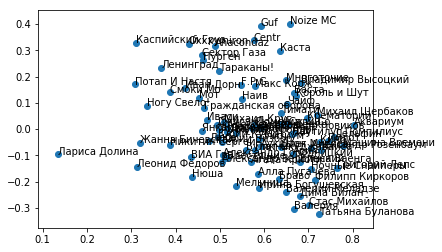

In [125]:

fig, ax = plt.subplots()
ax.scatter(X_r[:,0],X_r[:,1])

for i, txt in enumerate(y):
    ax.annotate(txt, (X_r[i,0],X_r[i,1]))

In [126]:
df_X = pd.DataFrame(X_r)
df_X['y'] = y
df_X.to_csv('pca_songs.csv', index = False)

           0         1         2         3         4         5         6  \
0   0.489053  0.316711 -0.117234 -0.061774 -0.004861 -0.036062 -0.086712   
1   0.576951  0.337317 -0.069014 -0.199260  0.101640 -0.203773  0.085152   
2   0.546936  0.167767 -0.089615 -0.116134 -0.061200  0.309246  0.028835   
3   0.591913  0.392350 -0.065100 -0.191887  0.142619 -0.211610  0.087608   
4   0.658789  0.400126 -0.051655 -0.059819  0.050304 -0.049471  0.024356   
5   0.429575  0.324002 -0.127962 -0.055884  0.033590 -0.014139 -0.054942   
6   0.570720 -0.125959  0.107815  0.079047 -0.099777  0.173119  0.084659   
7   0.803082  0.016647 -0.108702  0.006472 -0.084636 -0.094711  0.031362   
8   0.503849 -0.124868 -0.029869  0.086447  0.159153 -0.063405 -0.022789   
9   0.506787 -0.100248 -0.136913  0.259742  0.025226 -0.083437 -0.063082   
10  0.593859  0.002801 -0.076360  0.137099  0.220607 -0.052851  0.042874   
11  0.705191 -0.071858 -0.092463  0.147844  0.083097 -0.041300  0.025749   
12  0.516609

In [127]:
normalizer = Normalizer(copy=False)
pca = make_pipeline(svd, normalizer)

In [154]:
#X_tr = pca.fit(X).transform(X)

km = KMeans(n_clusters=6, init='k-means++', max_iter=100, n_init=1)

clusters = km.fit_predict(X_r)


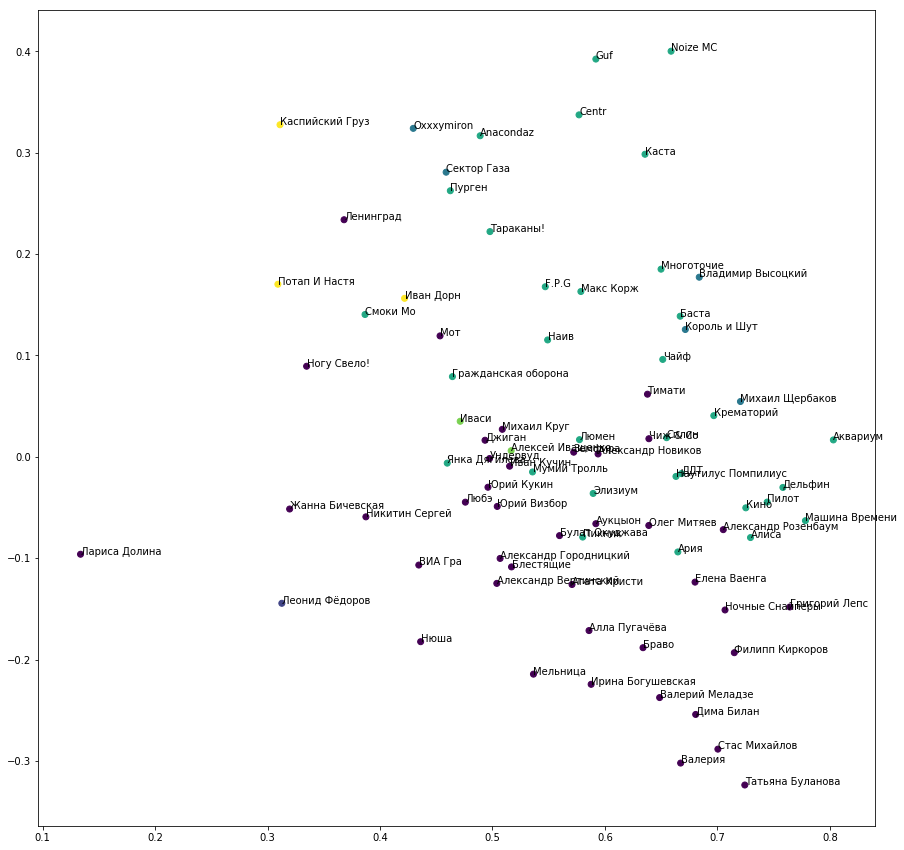

In [155]:

fig, ax = plt.subplots(figsize = (15,15))
ax.scatter(X_r[:, 0], X_r[:, 1], c=clusters)

for i, txt in enumerate(y):
    ax.annotate(txt, (X_r[i,0],X_r[i,1]))

In [156]:
df_X = pd.DataFrame(X_r[:,0:2], columns = ['x','y'])
df_X['name'] = y
df_X['c'] = clusters
df_X.to_csv('kmeans_songs.csv', index = False)